## **pyTopoComplexity (v0.7.3)**
### **Example for using `pyfracd` module to perform fractal dimension analysis** 

Fractal dimension analysis provides a powerful method for characterizing the roughness and complexity of land surfaces using Digital Elevation Model (DEM) data. This approach, as implemented in the `pyfracd` module, offers a quantitative measure of terrain texture at various scales. For each cell in the DEM, the local fractal dimension is calculated using the intersection of the surface within the moving window with four vertical planes corresponding to the principal geographical directions (N-S, E-W, NW-SE, and NE-SW). This reduces the problem to estimating the fractal dimension of one-dimensional topographic profiles. The variogram method is used to estimate the fractal dimension of these profiles. The variogram, a statistical function that estimates the dissimilarity between two random variables separated by a distance, is particularly effective for this purpose. The relationship between the variogram and distance is modeled using a power-law function, from which the fractal dimension can be derived.

The pyfracd class implements this methodology, providing not only the local fractal dimension estimates but also reliability parameters such as the standard error of the estimated fractal dimension and the coefficient of determination. These additional metrics help assess the quality and reliability of the fractal dimension estimates across the analyzed terrain.

To use this code, please cite the Zenodo repository that hosts the latest release of this code: 
* Lai, L. S.-H. (2024). pyTopoComplexity. Zenodo. https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComlexity
<hr>

### **Theory** (adapted from Pardo-Igúzquiza & Dowd, 2022)

The foundation of the fractal dimension calculation is the variogram, a statistical function that estimates the dissimilarity between two random variables separated by a distance. For topographic analysis, the variogram is defined as:

$$\gamma(h) = \frac{1}{2} E\{[Z(i + h) - Z(i)]^2\}$$

Here, $\gamma(h)$ is the variogram for distance $h$, $E\{\cdot\}$ is the mathematical expectation operator, and $Z(i)$ is the random variable describing the altitude at location $i$. The variogram is crucial because it captures the spatial structure of the topography, which is key to understanding its fractal properties.

For fractal surfaces, the variogram follows a power-law model:

$$\gamma(h) = \alpha h^\beta, \quad \alpha \geq 0; \quad 0 \leq \beta < 2$$

The parameters $\alpha$ and $\beta$ define the power variogram model. This model is particularly useful because it directly relates to the fractal dimension of the surface. The relationship between the fractal dimension (FD) and $\beta$ is given by:

$$FD = E + 1 - \frac{\beta}{2}$$

where $E$ is the topological dimension of the Euclidean space. For one-dimensional topographic profiles (where $E = 1$), this simplifies to:

$$(FD)_1 = 2 - \frac{\beta}{2}$$

To estimate the fractal dimension of a two-dimensional surface from these one-dimensional profiles, we use:

$$(FD)_2^* = 1 + (FD)_1^*$$

This allows us to characterize the roughness of the entire surface based on analyses of multiple one-dimensional profiles.

In practice, we estimate the variogram from the DEM data using:

$$\gamma_1(k) = \frac{1}{2(L-k)} \sum_{l=1}^{L-k} [z(i) - z(i+l)]^2$$

Here, $L$ is the profile length, $k$ is the lag distance, and $z(i)$ is the observed altitude at position $i$. This estimator allows us to calculate the variogram from discrete elevation data.

To estimate $\beta$, which is crucial for determining the fractal dimension, we use the log-log relationship:

$$\ln[\gamma_1(k)] = \beta \ln[k] + \ln[\alpha]$$

By fitting a line to this log-log plot, we can estimate $\beta$ from the slope.

The local fractal dimension is calculated using a moving window approach. For each pixel $(i,j)$ in the DEM, we consider profiles in four directions. For example, the East-West profile is:

$$\{z(i-W/2,j), z(i-W/2+1,j), \ldots, z(i-1,j), z(i,j), z(i+1,j), \ldots, z(i+W/2-1,j), z(i+W/2,j)\}$$

where $W$ is the size of the moving window and $z(i,j)$ is the altitude of pixel $(i,j)$. Similar profiles are extracted for the other three directions.

By applying these equations to each pixel in the DEM, we can create a new raster map showing the spatial variability of topographic roughness. This approach allows for a detailed characterization of terrain complexity, revealing patterns and structures that might not be apparent in the original elevation data. The resulting fractal dimension maps provide valuable insights for geomorphological and geological studies, particularly in remote or inaccessible areas like the Martian surface.
<hr>

### **References**
##### Journal Articles: 
* Pardo-Igúzquiza, E., Dowd, P.A., 2022. The roughness of martian topography: A metre-scale fractal analysis of six selected areas. Icarus 384, 115109. https://doi.org/10.1016/j.icarus.2022.115109.
* Wilson, M.F.J., O’Connell, B., Brown, C., Guinan, J.C., Grehan, A.J., 2007. Multiscale Terrain Analysis of Multibeam Bathymetry Data for Habitat Mapping on the Continental Slope. Marine Geodesy 30, 3-35. https://doi.org/10.1080/01490410701295962 

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' and 'Snohoco Hazel 2006' projects [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### 1. Import raster

In [21]:
import os

base_dir = os.getcwd()  # Change the directory of base folder as needed
base_dir = os.path.join(base_dir, 'ExampleDEM')
input_file = 'Ososlid2014_f_3ftgrid.tif'
input_dir = os.path.join(base_dir, input_file)

#### 2. Run fractal dimension analysis

**How the Number of Lags Affects Fractal Dimension Estimates**

In the pyfracd class, the `window_size` parameter sets the number of lags (how big of the moving window)) used to calculate fractal dimensions. The number of lags is related to the scale of geomorphic complexity in analysis. A bigger window can take longer for the computer to calculate. User may turn on the `chunk_processing` function to shorten the processing time (it is on by default).

Analyzing rows:   0%|          | 0/2050 [00:00<?, ?it/s]

FD2 MIN : 0.0
FD2 MAX : 3.0
SE MIN : 0.0
SE MAX : 0.1360670030117035
R2 MIN : 0.0
R2 MAX : 0.9999973773956299


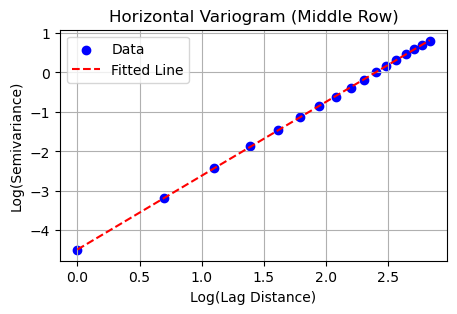

Estimated Fractal Dimension: 2.064460226744064


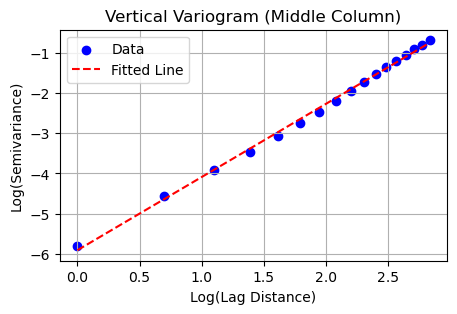

Estimated Fractal Dimension: 2.088997230032921


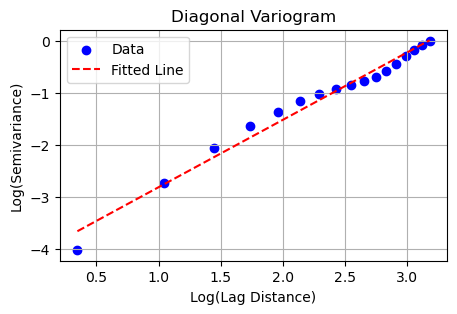

Estimated Fractal Dimension: 2.351212894243152


In [22]:
from pytopocomplexity import pyfracd

# Create pyfracd instance
fa = pyfracd(window_size=17, chunk_processing=True, chunksize=(512, 512))

# Run the analysis using pyfrad modeul (with variogram plotting function on)
Z, fd_result, se_result, r2_result, meta, window_m = fa.analyze(input_dir, variograms=True)

#### 3. Export results

In [23]:
# Generate output file name
output_fd_file = os.path.splitext(input_file)[0] + f'_pyFD({round(window_m, 2)}m).tif'
output_fdse_file = os.path.splitext(input_file)[0] + f'_pyFDse({round(window_m, 2)}m).tif'
output_fdr2_file = os.path.splitext(input_file)[0] + f'_pyFDr2({round(window_m, 2)}m).tif'
output_fd_dir = os.path.join(base_dir, output_fd_file)
output_fdse_dir = os.path.join(base_dir, output_fdse_file)
output_fdr2_dir = os.path.join(base_dir, output_fdr2_file)

# Export results using pyfracd module
fa.export_results(output_fd_dir, output_fdse_dir, output_fdr2_dir, meta)

Processed result saved to Ososlid2014_f_3ftgrid_pyFD(15.54m).tif
Processed result saved to Ososlid2014_f_3ftgrid_pyFDse(15.54m).tif
Processed result saved to Ososlid2014_f_3ftgrid_pyFDr2(15.54m).tif


#### 4. Display results

Products of Fractal Dimension Analysis include:

1. **Local Fractal Dimension (FD) Map**: Displays the spatial distribution of fractal dimension values (2-3) across the terrain, with higher values indicating greater surface roughness.

2. **Standard Error (SE) Map**: Shows the uncertainty associated with each local FD estimate, with lower values indicating more reliable estimates.

3. **Coefficient of Determination (R²) Map**: Indicates how well the power-law model fits the experimental variogram data at each location, with higher values suggesting better fit and more reliable estimates.

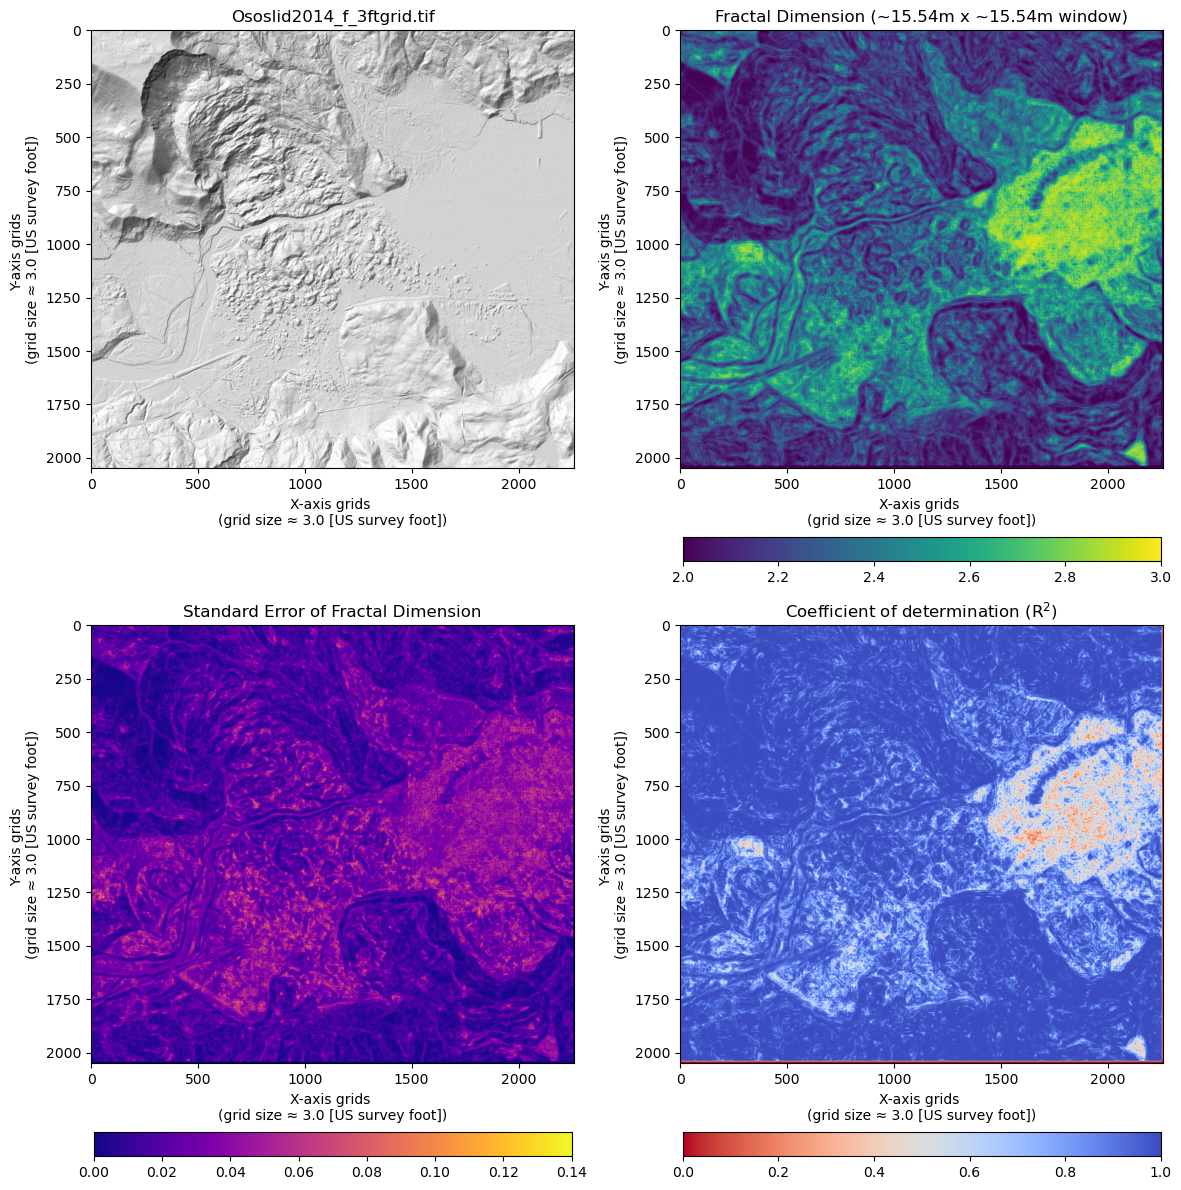

In [24]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# Get CRS information for plotting
with rasterio.open(input_dir) as src:
    transform = src.transform
    crs = src.crs

# Plot results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Plot the hillshade
ls = LightSource(azdeg=315, altdeg=45)
hillshade = ls.hillshade(Z, vert_exag=2)
hs = axes[0, 0].imshow(hillshade, cmap='gray')
axes[0, 0].set_title(input_file)
axes[0, 0].set_xlabel(f'X-axis grids \n(grid size ≈ {round(transform[0],4)} [{crs.linear_units}])')
axes[0, 0].set_ylabel(f'Y-axis grids \n(grid size ≈ {-round(transform[4],4)} [{crs.linear_units}])')
cbar1 = fig.colorbar(hs, ax=axes[0, 0], orientation='horizontal', fraction=0.045, pad=0.13)
cbar1.ax.set_visible(False)

# Plot the Fractal Dimension
im1 = axes[0, 1].imshow(fd_result, cmap='viridis')
im1.set_clim(2, 3)
axes[0, 1].set_title(f'Fractal Dimension (~{round(window_m, 2)}m x ~{round(window_m, 2)}m window)')
axes[0, 1].set_xlabel(f'X-axis grids \n(grid size ≈ {round(transform[0],4)} [{crs.linear_units}])')
axes[0, 1].set_ylabel(f'Y-axis grids \n(grid size ≈ {-round(transform[4],4)} [{crs.linear_units}])')
cbar2 = fig.colorbar(im1, ax=axes[0, 1], orientation='horizontal', fraction=0.045, pad=0.13)

# Plot the Standard Error
im2 = axes[1, 0].imshow(se_result, cmap='plasma')
im2.set_clim(round(np.nanpercentile(se_result, 0), 2), round(np.nanpercentile(se_result, 100), 2))
axes[1, 0].set_title('Standard Error of Fractal Dimension')
axes[1, 0].set_xlabel(f'X-axis grids \n(grid size ≈ {round(transform[0],4)} [{crs.linear_units}])')
axes[1, 0].set_ylabel(f'Y-axis grids \n(grid size ≈ {-round(transform[4],4)} [{crs.linear_units}])')
cbar3 = fig.colorbar(im2, ax=axes[1, 0], orientation='horizontal', fraction=0.045, pad=0.13)

# Plot the r-square
im3 = axes[1, 1].imshow(r2_result, cmap='coolwarm_r')
im3.set_clim(0, round(np.nanpercentile(r2_result, 100), 2))
axes[1, 1].set_title('Coefficient of determination (R$^{2}$)')
axes[1, 1].set_xlabel(f'X-axis grids \n(grid size ≈ {round(transform[0],4)} [{crs.linear_units}])')
axes[1, 1].set_ylabel(f'Y-axis grids \n(grid size ≈ {-round(transform[4],4)} [{crs.linear_units}])')
cbar4 = fig.colorbar(im3, ax=axes[1, 1], orientation='horizontal', fraction=0.045, pad=0.13)

plt.tight_layout()
plt.savefig('pyfracd.png', dpi=200, bbox_inches='tight')
plt.show()